In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from math import log10

In [2]:
def get_type(watts: int) -> float:
    # based on extended Kardashev scale, formula from: 
    # https://iopscience.iop.org/article/10.3847/1538-3881/ab792b#ajab792bs2
    return log10(watts/(10**6))/10

data = [
    [1800, 6.4*10**11],
    [1900, 1.4*10**12],
    [1965, 4.9*10**12],
    [2000, 1.3*10**13],
    [2015, 1.7*10**13]]

data = [[d[0], d[1], get_type(d[1])] for d in data]

df = pd.DataFrame(data, columns=['Year', 'Watts', 'Type'])
df

,Year,Watts,Type
0,1800,6.400000e+11,0.580618
1,1900,1.400000e+12,0.614613
2,1965,4.900000e+12,0.669020
3,2000,1.300000e+13,0.711394
4,2015,1.700000e+13,0.723045


<AxesSubplot:xlabel='Year', ylabel='Watts'>

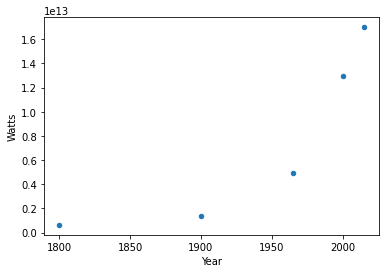

In [3]:
df.plot.scatter(x='Year', y='Watts')

<AxesSubplot:xlabel='Year', ylabel='Type'>

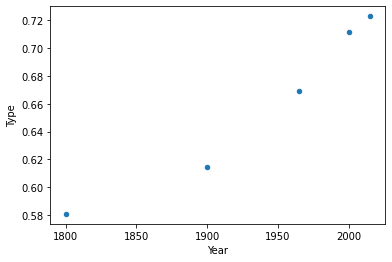

In [4]:
# linear regression won't work on Watts as the progression is not linear
# try type
df.plot.scatter(x='Year', y='Type')

In [5]:
# closer to linear!
type_feature = df[['Type']].values
all_features = df[['Type', 'Watts']].values
labels = df['Year'].values
print(f'Type Features shape: {np.shape(type_feature)}')
print(f'All Features shape:  {np.shape(all_features)}')
print(f'Labels shape:        {np.shape(labels)}')

lr_model = LinearRegression().fit(type_feature, labels)
                             
types = [[1.0], [2.0]]
lr_model.predict(types)

Type Features shape: (5, 1)
All Features shape:  (5, 2)
Labels shape:        (5,)


array([2409.63911098, 3801.62237603])

In [6]:
b, m = lr_model.intercept_, lr_model.coef_
print(f"(y = mx + b)...\nyear = ({round(m[0],2)} * type) + {round(b,2)}")


(y = mx + b)...
year = (1391.98 * type) + 1017.66


## Attempt at non-leanear prediction below failing!

Too little data or calling wrong?

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor().fit(all_features, labels)
types_and_watts = [[1.0, 10**16], [2.0, 10**26]]
rf_model.predict(types_and_watts)

array([2008.25, 2008.25])

In [8]:
rf_model2 = RandomForestRegressor().fit(type_feature, labels)
rf_model2.predict(types)

array([2006.3, 2006.3])

# Try scipy to fit a regression curve

looks like another fail! Perhaps just not enough data points to fit a good curve. Also want to find out how to do this for multiple features

In [16]:
from scipy.optimize import curve_fit

def opt_func(x, a, b, c):
    "Otimise on ax^2 + bx + c"
    #print(f"Solving x^a + bx + c for: x: {x}, a, b, c: {a}, {b}, {c}")
    return np.power(a*x, 2) + (b*x) + c
(a,b,c), pcov = curve_fit(opt_func, 
                          xdata=df['Year'].values, 
                          ydata=df['Type'].values,
                          bounds=(0, np.inf))

print(f"a,b,c set to {a:.3}, {b:.3}, {c:.3}")
print(f"i.e. y = ax^2 + bx + c -> y = {a:.3}^2 + ({b:.3} * x) + {c:.3}\n")

for x in np.linspace(1800, 4000, 23):
    v = opt_func(x, a, b, c)
    print(f"Year {int(x)}, est type: {v:.3}")

a,b,c set to 0.000419, 3.53e-17, 8.97e-18
i.e. y = ax^2 + bx + c -> y = 0.000419^2 + (3.53e-17 * x) + 8.97e-18

Year 1800, est type: 0.569
Year 1900, est type: 0.634
Year 2000, est type: 0.703
Year 2100, est type: 0.775
Year 2200, est type: 0.851
Year 2300, est type: 0.93
Year 2400, est type: 1.01
Year 2500, est type: 1.1
Year 2600, est type: 1.19
Year 2700, est type: 1.28
Year 2800, est type: 1.38
Year 2900, est type: 1.48
Year 3000, est type: 1.58
Year 3100, est type: 1.69
Year 3200, est type: 1.8
Year 3300, est type: 1.91
Year 3400, est type: 2.03
Year 3500, est type: 2.15
Year 3600, est type: 2.28
Year 3700, est type: 2.41
Year 3800, est type: 2.54
Year 3900, est type: 2.67
Year 4000, est type: 2.81


In [13]:
# for some reason ity seems to go up too quickly when using type to 
# predict year (above) and too slow when using watts (below)

In [17]:
(a,b,c), pcov = curve_fit(opt_func, 
                          xdata=df['Year'].values, 
                          ydata=df['Watts'].values,
                          bounds=(0, np.inf))

for x in np.linspace(1800, 4000, 23):
    v = opt_func(x, a, b, c)
    print(f"Year {int(x)}, est power: {v:.2e} Watts")

Year 1800, est power: 6.72e+12 Watts
Year 1900, est power: 7.49e+12 Watts
Year 2000, est power: 8.29e+12 Watts
Year 2100, est power: 9.14e+12 Watts
Year 2200, est power: 1.00e+13 Watts
Year 2300, est power: 1.10e+13 Watts
Year 2400, est power: 1.19e+13 Watts
Year 2500, est power: 1.30e+13 Watts
Year 2600, est power: 1.40e+13 Watts
Year 2700, est power: 1.51e+13 Watts
Year 2800, est power: 1.63e+13 Watts
Year 2900, est power: 1.74e+13 Watts
Year 3000, est power: 1.87e+13 Watts
Year 3100, est power: 1.99e+13 Watts
Year 3200, est power: 2.12e+13 Watts
Year 3300, est power: 2.26e+13 Watts
Year 3400, est power: 2.40e+13 Watts
Year 3500, est power: 2.54e+13 Watts
Year 3600, est power: 2.69e+13 Watts
Year 3700, est power: 2.84e+13 Watts
Year 3800, est power: 2.99e+13 Watts
Year 3900, est power: 3.15e+13 Watts
Year 4000, est power: 3.32e+13 Watts
